## Exploratory Data Analysis

In this notebook we will:
- download the data from UCI ML repository
- Check for Data type of columns, missing values and outliers
- Look for the category distribution in categorical columns
- Check the correlation and look for new variables 

##### Importing necessay libraries

In [5]:
#importing a few general use case libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

import warnings
warnings.filterwarnings('ignore')

##### collecting the data

In [9]:
# collecting the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
if not os.path.exists('../data/'):
    os.makedirs('../data/')
filename = '../data/auto_mpg.data'
urllib.request.urlretrieve(url, filename)

('../data/auto_mpg.data', <http.client.HTTPMessage at 0x27fd10de740>)

In [11]:
# reading the .data file using pandas

columns = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('../data/auto_mpg.data', names=columns, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


##### Exploration

In [12]:
##checking the column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


this confirm that 5 columns are numeric and continuous (float64) while 3 are numeric and discrete (those are actually categorical column). looking at the non null column we can also observe that they are some missing values in the Horsepower column

<AxesSubplot:>

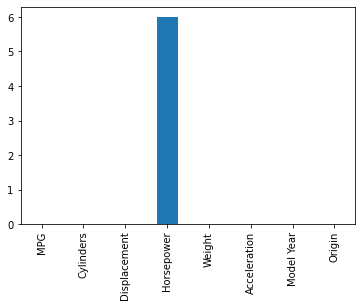

In [26]:
##histogram of missing values
df.isnull().sum().plot(kind='bar')

In [27]:
##summary statistics of quantitative variables
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Since they are few missing values from one of the column, let's investigate more on that column to see what we can do whith thise missing values. let's look at the boxplot to check the existance of any outliers

<AxesSubplot:xlabel='Horsepower'>

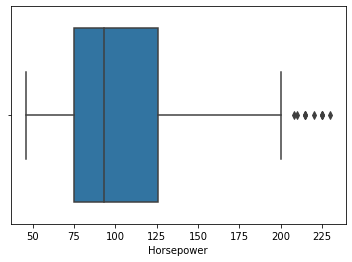

In [28]:
sns.boxplot(x=df['Horsepower'])

<AxesSubplot:ylabel='Density'>

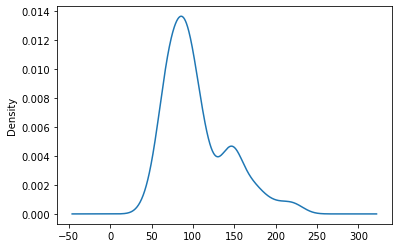

In [29]:
# plot distribution of values in Marks column
df['Horsepower'].plot(kind='kde')

Since there are a few outliers, we can use the median of the column to impute the missing values using the pandas median() method. this is just a simple solution but there are many inputations techniques depending on the type of data. follow this link to learn some of them :
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

In [15]:
# imputation of missing values with median
median_ = df['Horsepower'].median()
df['Horsepower'] = df['Horsepower'].fillna(median_)

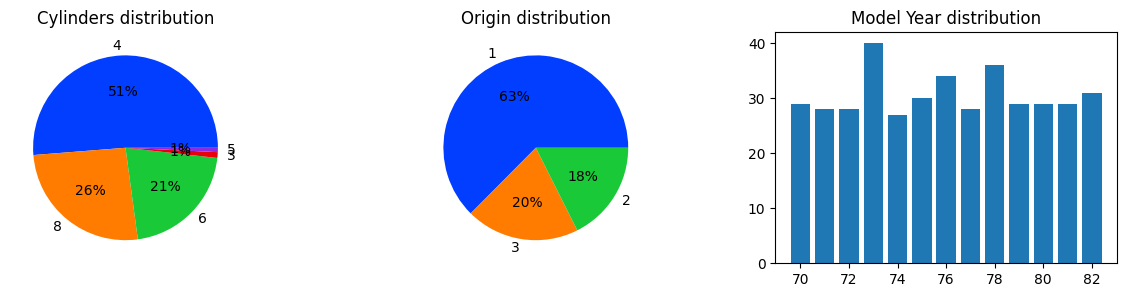

In [40]:
# checking categorical columns distribution

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

plt.figure(figsize=(15,3))
i=1
for col in ['Cylinders','Origin','Model Year']:
    # declaring data
    data = df[col].value_counts().values
    keys = df[col].value_counts().index
    plt.subplot(1,3,i)
    # plotting data on chart
    if col=='Model Year':
        plt.bar(x=keys,height=data)
        plt.title(f'{col} distribution')
    else:
        plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
        plt.title(f'{col} distribution') 
    i+=1
# displaying chart
plt.show()



Cylinders and Origin are not equaly distributed. this will help on how to divide the data into train set and test set

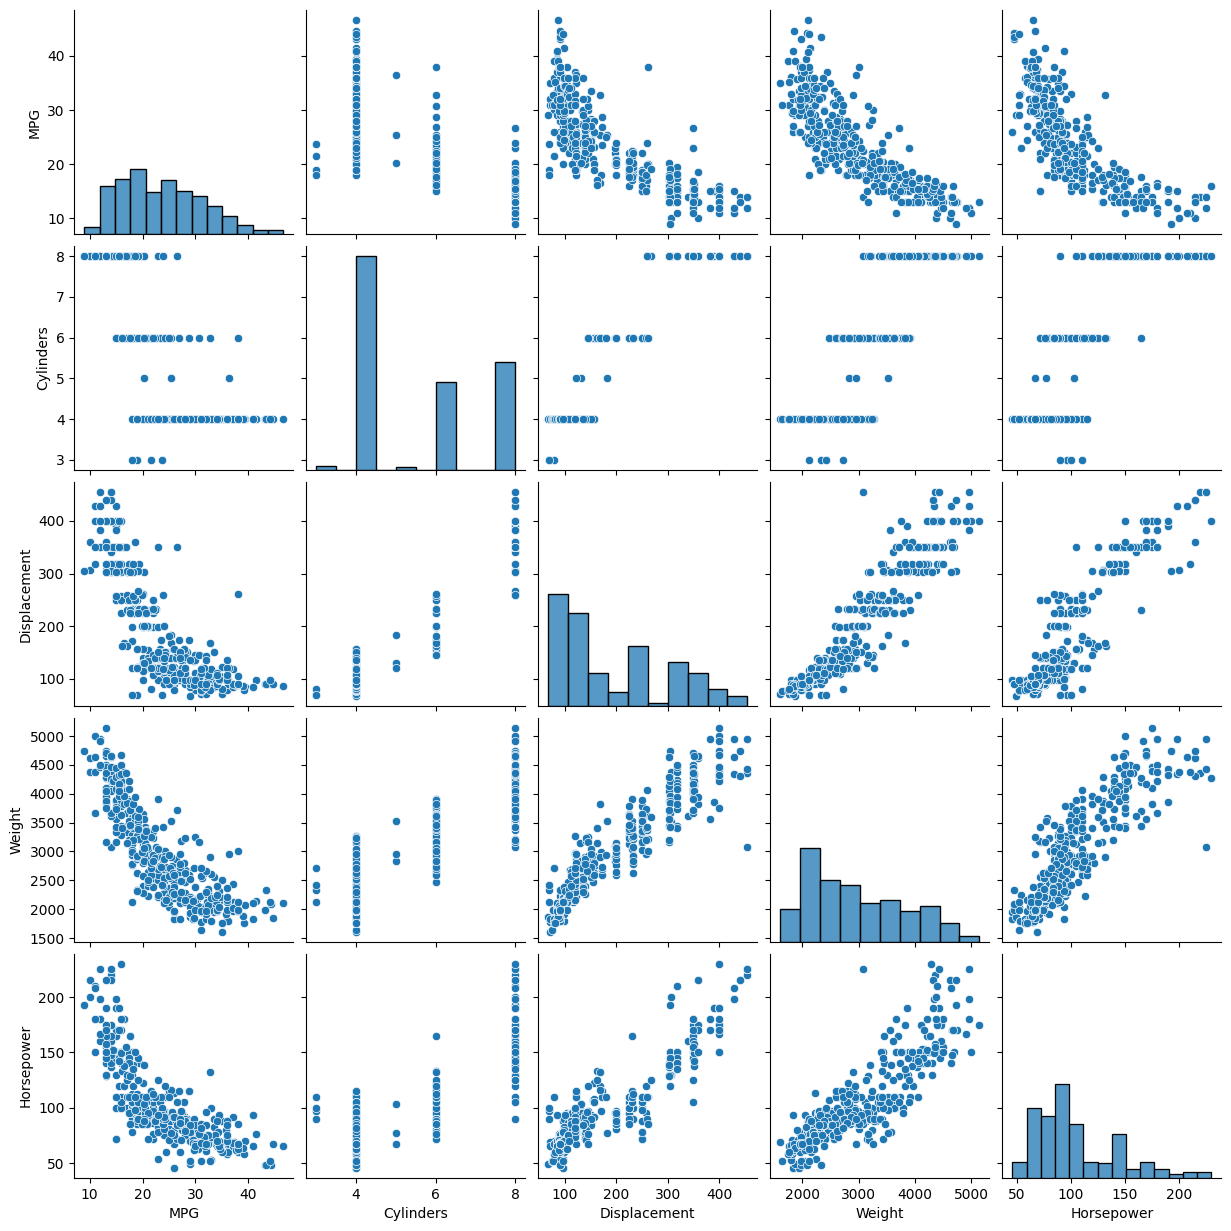

In [42]:
## checing potential correlations between continus variables
sns.pairplot(df[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="hist")

from this plot, we have a brief overview of how each variable behaves with respect to every other variable. For example, the MPG column has a negative correlation with the displacement, weight, and horsepower features.

<Axes: >

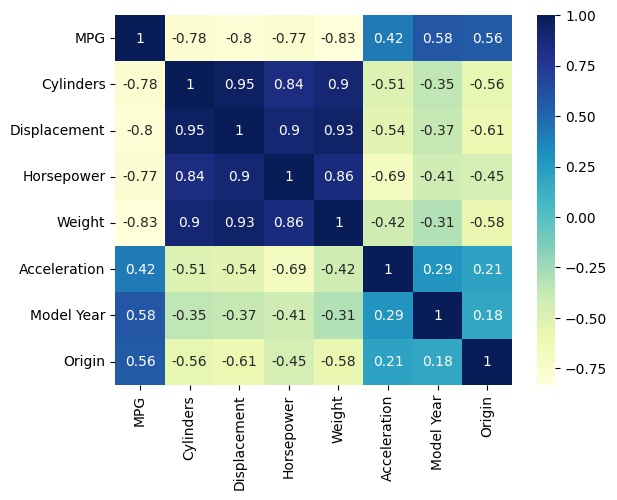

In [43]:
# Checking correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

from this plot, we can see all the correlation coefficients in a heat map. this will help in selecting features for the modeling part 

Now that we have some insights about the data, let's move to the data preparation